Mounting Drive

Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os,shutil
import pandas as pd
import keras
from keras.layers import *
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.models import load_model

2023-02-27 05:51:22.965938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 05:51:23.550079: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 05:51:23.550128: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 05:51:23.550132: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

**Train Data**

In [2]:
path="../Control_400/three_one"
train=os.listdir(path)
print(train)
print("Training Data:- ")
for f in train:
  path="../Control_400/three_one/"+f
  print(f+ " "+ str(len(os.listdir(path))))

['Third_400', 'First_400']
Training Data:- 
Third_400 400
First_400 400


**Valid Data**

**Test Data**

In [3]:
from keras.utils import load_img, img_to_array
path="../Control_400/three_one"
test=os.listdir(path)
print(test)
image_data_train=[]
label_train=[]
for f in test:
  path="../Control_400/three_one/"+f+'/'
  entries=os.listdir(path)
  for entry in entries:
      if f=='First_400':
        label=0
      else:
        label=1
 
      img=load_img(path+entry,target_size=(224,224,3))
      image_array=img_to_array(img)/255.0
      image_data_train.append(image_array)
      label_train.append(label)

image_data_train=np.array(image_data_train)
label_train=np.array(label_train)
print(image_data_train.shape)
print(len(label_train))

['Third_400', 'First_400']
(800, 224, 224, 3)
800


In [4]:
import sklearn.model_selection as sk

X1_train, X_test, y1_train, y_test =  sk.train_test_split(image_data_train,label_train,test_size=0.15, random_state = 42)
X_train, X_valid, y_train, y_valid =  sk.train_test_split(X1_train, y1_train,test_size=0.17, random_state = 42)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **Resnet 50**

In [8]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet", pooling='max')

for layer in base_model.layers:
    layer.trainable = False

2023-02-26 06:32:30.968410: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-26 06:32:30.968510: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-02-26 06:32:30.969470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
from tensorflow.keras import layers 
from tensorflow.keras import Model

In [28]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.7)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy',metrics = ['acc'])

In [29]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [30]:
Resnethist = model.fit(X_train,y_train, validation_data= (X_valid,y_valid), steps_per_epoch = 2,  epochs = 100)
#Here 169 train Data size and 27 Test Data size

Epoch 1/100
2/2 [==============================] - 24s 13s/step - loss: 4.3806 - acc: 0.5106 - val_loss: 3.0111 - val_acc: 0.5259
Epoch 2/100
2/2 [==============================] - 21s 12s/step - loss: 2.6143 - acc: 0.5142 - val_loss: 3.5605 - val_acc: 0.4741
Epoch 3/100
2/2 [==============================] - 21s 12s/step - loss: 3.1555 - acc: 0.5106 - val_loss: 1.3298 - val_acc: 0.4741
Epoch 4/100
2/2 [==============================] - 21s 12s/step - loss: 1.5109 - acc: 0.5177 - val_loss: 1.8030 - val_acc: 0.5259
Epoch 5/100
2/2 [==============================] - 21s 12s/step - loss: 2.0271 - acc: 0.5089 - val_loss: 1.1810 - val_acc: 0.5259
Epoch 6/100
2/2 [==============================] - 21s 13s/step - loss: 1.4035 - acc: 0.5035 - val_loss: 1.0387 - val_acc: 0.5431
Epoch 7/100
2/2 [==============================] - 21s 12s/step - loss: 1.2776 - acc: 0.5780 - val_loss: 1.3287 - val_acc: 0.5172
Epoch 8/100
2/2 [==============================] - 22s 13s/step - loss: 1.2653 - acc: 0.57

Epoch 64/100
2/2 [==============================] - 16s 9s/step - loss: 0.4517 - acc: 0.7819 - val_loss: 0.5523 - val_acc: 0.7328
Epoch 65/100
2/2 [==============================] - 16s 9s/step - loss: 0.4400 - acc: 0.8014 - val_loss: 0.5503 - val_acc: 0.7241
Epoch 66/100
2/2 [==============================] - 15s 9s/step - loss: 0.4202 - acc: 0.8156 - val_loss: 0.5495 - val_acc: 0.7328
Epoch 67/100
2/2 [==============================] - 16s 9s/step - loss: 0.4135 - acc: 0.8121 - val_loss: 0.5512 - val_acc: 0.7241
Epoch 68/100
2/2 [==============================] - 16s 9s/step - loss: 0.4393 - acc: 0.7926 - val_loss: 0.5529 - val_acc: 0.7241
Epoch 69/100
2/2 [==============================] - 15s 9s/step - loss: 0.4379 - acc: 0.8032 - val_loss: 0.5524 - val_acc: 0.7328
Epoch 70/100
2/2 [==============================] - 16s 9s/step - loss: 0.4324 - acc: 0.8156 - val_loss: 0.5508 - val_acc: 0.7328
Epoch 71/100
2/2 [==============================] - 16s 9s/step - loss: 0.4230 - acc: 0.82

In [31]:
df = pd.DataFrame({'loss' : Resnethist.history["loss"],
                                'val_loss' : Resnethist.history["val_loss"],
                                'accuracy' : Resnethist.history["acc"],
                               "val_accuracy": Resnethist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('First_third/Resnethist_13.csv')

/tmp/ipykernel_872752/732866810.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


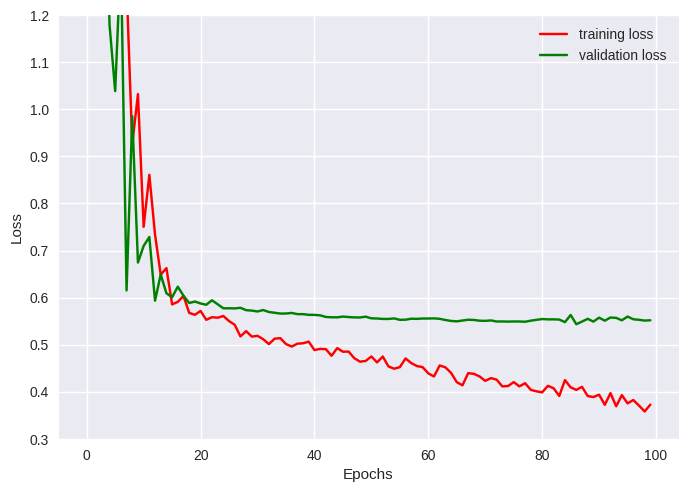

In [32]:
plt.style.use("seaborn")
plt.plot(Resnethist.history['loss'],label="training loss",c='red')
plt.plot(Resnethist.history['val_loss'],label="validation loss",c='green')
plt.ylim(0.3,1.2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

/tmp/ipykernel_872752/4257354701.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


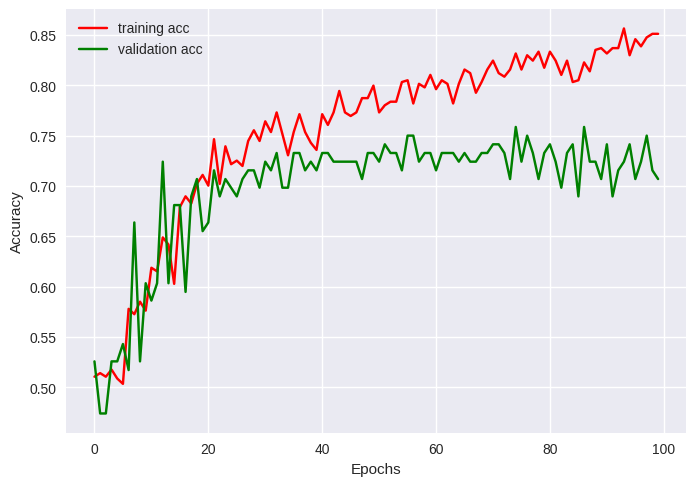

In [33]:
plt.style.use("seaborn")
plt.plot(Resnethist.history['acc'],label="training acc",c='red')
plt.plot(Resnethist.history['val_acc'],label="validation acc",c='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

4/4 [==============================] - 5s 1s/step
confusion Matrix:
[[49  8]
 [12 51]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

 Trimester 1       0.80      0.86      0.83        57
 Trimester 3       0.86      0.81      0.84        63

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.84      0.83      0.83       120

**********************************************
Accuracy Score : 0.8333333333333334
**********************************************
F1 Score : 0.8360655737704918
**********************************************
Class Wise Accuracy :
Trimester 2 Accuracy : 85.96491228070175
Trimester 3 Accuracy : 80.95238095238095
**********************************************
ROC_AUC Score: 0.8345864661654135
**********************************************
Cohen_kappa score: 0.6669442131557035


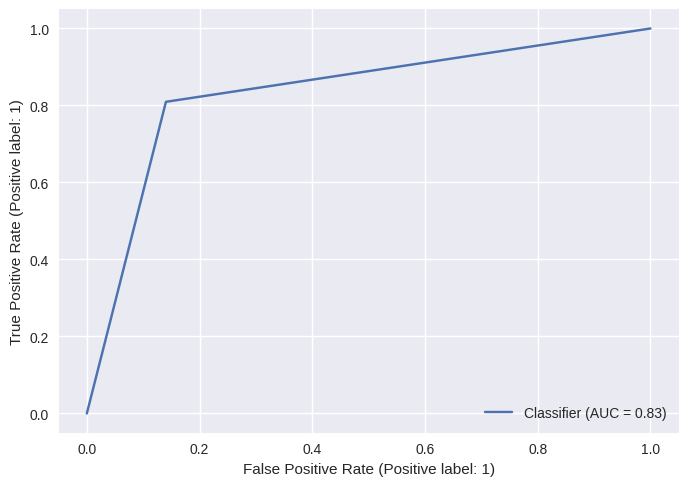

In [34]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 1','Trimester 3'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 2 Accuracy :", class_wise_acc[0]*100)
print("Trimester 3 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

# **VGG 16**

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model

base_model = VGG16(input_shape=(224, 224,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

In [15]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.7)(x)
x = layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00007), loss = 'binary_crossentropy',metrics = ['acc'])

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [17]:
vgghist = model.fit(X_train,y_train, validation_data=(X_valid,y_valid), steps_per_epoch = 2,  epochs = 100, shuffle =True)
#Here 169 train Data size and 27 Test Data size


Epoch 1/100
2/2 [==============================] - 14s 8s/step - loss: 0.9916 - acc: 0.4911 - val_loss: 0.6567 - val_acc: 0.5431
Epoch 2/100
2/2 [==============================] - 13s 8s/step - loss: 0.8680 - acc: 0.5567 - val_loss: 0.6693 - val_acc: 0.5259
Epoch 3/100
2/2 [==============================] - 13s 8s/step - loss: 0.7433 - acc: 0.5798 - val_loss: 0.5947 - val_acc: 0.7241
Epoch 4/100
2/2 [==============================] - 13s 8s/step - loss: 0.6250 - acc: 0.6489 - val_loss: 0.5591 - val_acc: 0.7328
Epoch 5/100
2/2 [==============================] - 13s 8s/step - loss: 0.6082 - acc: 0.6631 - val_loss: 0.5369 - val_acc: 0.7328
Epoch 6/100
2/2 [==============================] - 13s 8s/step - loss: 0.5606 - acc: 0.7110 - val_loss: 0.5026 - val_acc: 0.7845
Epoch 7/100
2/2 [==============================] - 13s 8s/step - loss: 0.5111 - acc: 0.7411 - val_loss: 0.4966 - val_acc: 0.7586
Epoch 8/100
2/2 [==============================] - 13s 8s/step - loss: 0.6390 - acc: 0.6684 - val

2/2 [==============================] - 13s 8s/step - loss: 0.1705 - acc: 0.9344 - val_loss: 0.3335 - val_acc: 0.8362
Epoch 65/100
2/2 [==============================] - 13s 8s/step - loss: 0.1697 - acc: 0.9433 - val_loss: 0.3302 - val_acc: 0.8276
Epoch 66/100
2/2 [==============================] - 13s 8s/step - loss: 0.2019 - acc: 0.9220 - val_loss: 0.7199 - val_acc: 0.7069
Epoch 67/100
2/2 [==============================] - 13s 8s/step - loss: 0.4763 - acc: 0.7748 - val_loss: 0.4084 - val_acc: 0.7414
Epoch 68/100
2/2 [==============================] - 13s 8s/step - loss: 0.2175 - acc: 0.9131 - val_loss: 0.3205 - val_acc: 0.8534
Epoch 69/100
2/2 [==============================] - 13s 8s/step - loss: 0.1572 - acc: 0.9592 - val_loss: 0.3355 - val_acc: 0.8621
Epoch 70/100
2/2 [==============================] - 13s 8s/step - loss: 0.1697 - acc: 0.9468 - val_loss: 0.3579 - val_acc: 0.8534
Epoch 71/100
2/2 [==============================] - 13s 8s/step - loss: 0.1562 - acc: 0.9521 - val_loss

In [18]:
df = pd.DataFrame({'loss' : vgghist.history["loss"],
                                'val_loss' : vgghist.history["val_loss"],
                                'accuracy' : vgghist.history["acc"],
                               "val_accuracy": vgghist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('First_third/Vgghist_13.csv')

/tmp/ipykernel_1021571/2262050409.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


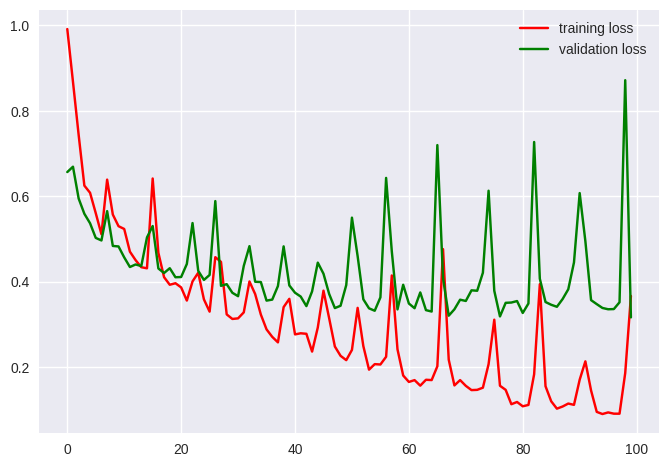

In [19]:
plt.style.use("seaborn")
plt.plot(vgghist.history['loss'],label="training loss",c='red')
plt.plot(vgghist.history['val_loss'],label="validation loss",c='green')
plt.legend()
plt.show()

/tmp/ipykernel_1021571/2764410738.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


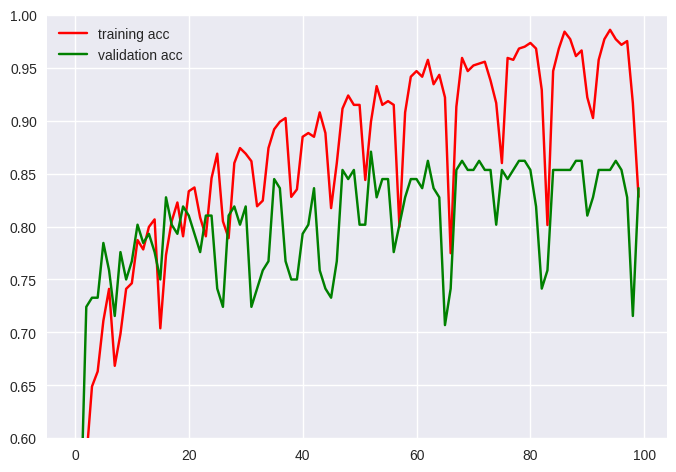

In [20]:
plt.style.use("seaborn")
plt.plot(vgghist.history['acc'],label="training acc",c='red')
plt.plot(vgghist.history['val_acc'],label="validation acc",c='green')
plt.ylim(0.6,1)
plt.legend()
plt.show()

4/4 [==============================] - 2s 582ms/step
confusion Matrix:
[[42 15]
 [ 5 58]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

 Trimester 2       0.89      0.74      0.81        57
 Trimester 3       0.79      0.92      0.85        63

    accuracy                           0.83       120
   macro avg       0.84      0.83      0.83       120
weighted avg       0.84      0.83      0.83       120

**********************************************
Accuracy Score : 0.8333333333333334
**********************************************
F1 Score : 0.8529411764705882
**********************************************
Class Wise Accuracy :
Trimester 2 Accuracy : 73.68421052631578
Trimester 3 Accuracy : 92.06349206349206
**********************************************
ROC_AUC Score: 0.8287385129490392
**********************************************
Cohen_kappa score: 0.6630160067396798


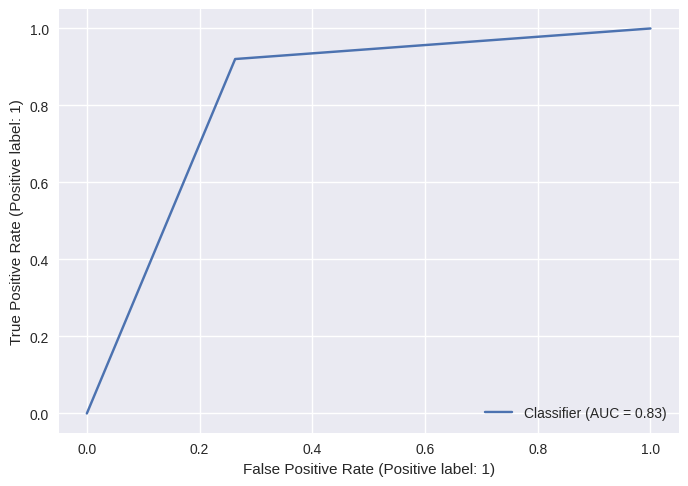

In [21]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 2','Trimester 3'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 2 Accuracy :", class_wise_acc[0]*100)
print("Trimester 3 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

#**Efficient Net**

In [23]:
!pip install -U efficientnet

In [7]:
import efficientnet.keras as efn

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model

base_model = efn.EfficientNetB0(input_shape=(224, 224,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

In [10]:
from tensorflow.keras import optimizers

In [81]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.7)(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.8)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [82]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                          

 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 56, 56, 144)  1296       ['block2b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2b_bn (BatchNormalization  (None, 56, 56, 144)  576        ['block2b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block2b_activation (Activation  (None, 56, 56, 144)  0          ['block2b_bn[0][0]']             
 )                                                                                                
          

                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 240)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_se_reduce (Conv2D)     (None, 1, 1, 10)     2410        ['block3b_se_reshape[0][0]']     
                                                                                                  
 block3b_se_expand (Conv2D)     (None, 1, 1, 240)    2640        ['block3b_se_reduce[0][0]']      
                                                                                                  
 block3b_s

 block4b_se_excite (Multiply)   (None, 14, 14, 480)  0           ['block4b_activation[0][0]',     
                                                                  'block4b_se_expand[0][0]']      
                                                                                                  
 block4b_project_conv (Conv2D)  (None, 14, 14, 80)   38400       ['block4b_se_excite[0][0]']      
                                                                                                  
 block4b_project_bn (BatchNorma  (None, 14, 14, 80)  320         ['block4b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_drop (FixedDropout)    (None, 14, 14, 80)   0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_a

 block5a_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5b_expand_conv (Conv2D)   (None, 14, 14, 672)  75264       ['block5a_project_bn[0][0]']     
                                                                                                  
 block5b_expand_bn (BatchNormal  (None, 14, 14, 672)  2688       ['block5b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5b_expand_activation (Act  (None, 14, 14, 672)  0          ['block5b_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block6a_expand_bn (BatchNormal  (None, 14, 14, 672)  2688       ['block6a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6a_expand_activation (Act  (None, 14, 14, 672)  0          ['block6a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6a_dwconv (DepthwiseConv2  (None, 7, 7, 672)   16800       ['block6a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6a_bn (BatchNormalization  (None, 7, 7, 672)   2688        ['block6a_dwconv[0][0]']         
 )        

 )                                                                                                
                                                                                                  
 block6c_activation (Activation  (None, 7, 7, 1152)  0           ['block6c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6c_se_squeeze (GlobalAver  (None, 1152)        0           ['block6c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6c_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block6c_se_squeeze[0][0]']     
                                                                                                  
 block6c_s

 block7a_se_squeeze (GlobalAver  (None, 1152)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block7a_se_squeeze[0][0]']     
                                                                                                  
 block7a_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block7a_se_reshape[0][0]']     
                                                                                                  
 block7a_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block7a_se_reduce[0][0]']      
                                                                                                  
 block7a_se_excite (Multiply)   (None, 7, 7, 1152)   0           ['block7a_activation[0][0]',     
          

In [83]:
EnetB0hist = model.fit(X_train,y_train, validation_data=(X_valid,y_valid), steps_per_epoch = 2,  epochs = 100, shuffle=True)
#Here 169 train Data size and 27 Test Data size

Epoch 1/100
2/2 [==============================] - 11s 5s/step - loss: 2.2921 - acc: 0.4787 - val_loss: 0.5501 - val_acc: 0.6983
Epoch 2/100
2/2 [==============================] - 8s 4s/step - loss: 2.4512 - acc: 0.5479 - val_loss: 0.4979 - val_acc: 0.7931
Epoch 3/100
2/2 [==============================] - 8s 5s/step - loss: 1.7960 - acc: 0.6028 - val_loss: 0.4619 - val_acc: 0.7759
Epoch 4/100
2/2 [==============================] - 8s 4s/step - loss: 1.8828 - acc: 0.5762 - val_loss: 0.4723 - val_acc: 0.7672
Epoch 5/100
2/2 [==============================] - 8s 4s/step - loss: 1.4175 - acc: 0.5904 - val_loss: 0.4602 - val_acc: 0.7672
Epoch 6/100
2/2 [==============================] - 8s 5s/step - loss: 1.2649 - acc: 0.6135 - val_loss: 0.4408 - val_acc: 0.7931
Epoch 7/100
2/2 [==============================] - 8s 5s/step - loss: 1.1877 - acc: 0.6348 - val_loss: 0.4428 - val_acc: 0.8190
Epoch 8/100
2/2 [==============================] - 8s 5s/step - loss: 1.0885 - acc: 0.6277 - val_loss: 

/tmp/ipykernel_872752/3717913482.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


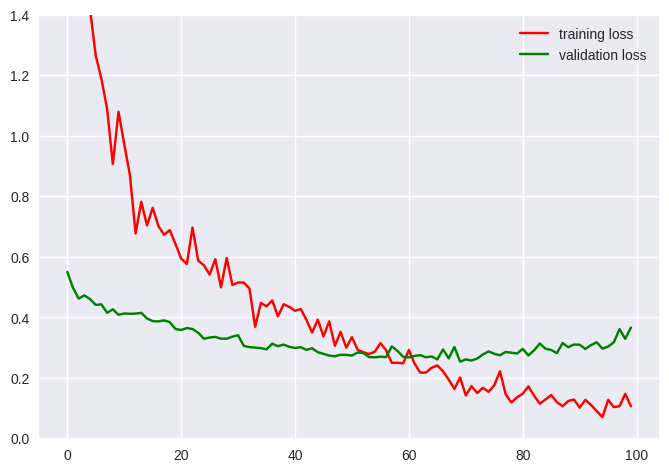

In [84]:
plt.style.use("seaborn")
plt.plot(EnetB0hist.history['loss'],label="training loss",c='red')
plt.plot(EnetB0hist.history['val_loss'],label="validation loss",c='green')
plt.ylim(0,1.4)
plt.legend()
plt.show()

/tmp/ipykernel_872752/1305480593.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


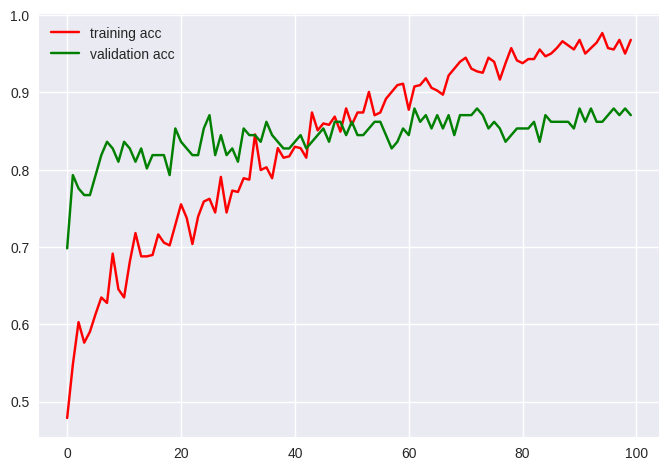

In [85]:
plt.style.use("seaborn")
plt.plot(EnetB0hist.history['acc'],label="training acc",c='red')
plt.plot(EnetB0hist.history['val_acc'],label="validation acc",c='green')
plt.legend()
plt.show()

4/4 [==============================] - 4s 504ms/step
confusion Matrix:
[[48  9]
 [ 6 57]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

 Trimester 2       0.89      0.84      0.86        57
 Trimester 3       0.86      0.90      0.88        63

    accuracy                           0.88       120
   macro avg       0.88      0.87      0.87       120
weighted avg       0.88      0.88      0.87       120

**********************************************
Accuracy Score : 0.875
**********************************************
F1 Score : 0.8837209302325582
**********************************************
Class Wise Accuracy :
Trimester 2 Accuracy : 84.21052631578947
Trimester 3 Accuracy : 90.47619047619048
**********************************************
ROC_AUC Score: 0.8734335839598997
**********************************************
Cohen_kappa score: 0.7487437185929648


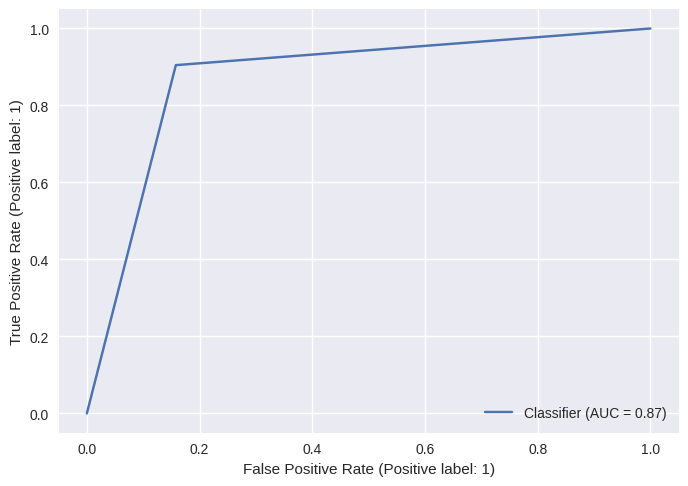

In [86]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 2','Trimester 3'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 2 Accuracy :", class_wise_acc[0]*100)
print("Trimester 3 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

In [87]:
df = pd.DataFrame({'loss' : EnetB0hist.history["loss"],
                                'val_loss' : EnetB0hist.history["val_loss"],
                                'accuracy' : EnetB0hist.history["acc"],
                               "val_accuracy": EnetB0hist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('First_third/EnetB0hist_13.csv')

# **Efficient Net B7**

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model

base_model = efn.EfficientNetB7(input_shape=(224, 224,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

2023-02-27 05:52:04.010748: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 05:52:04.010779: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-02-27 05:52:04.011463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = optimizers.RMSprop(learning_rate=0.00003), loss = 'binary_crossentropy',metrics = ['acc'])

In [12]:
EenetB7hist = model.fit(X_train,y_train, validation_data=(X_valid,y_valid), steps_per_epoch = 2,  epochs = 100, shuffle=True)


Epoch 1/100
2/2 [==============================] - 54s 27s/step - loss: 1.3831 - acc: 0.5053 - val_loss: 1.1765 - val_acc: 0.5259
Epoch 2/100
2/2 [==============================] - 38s 22s/step - loss: 1.1617 - acc: 0.5160 - val_loss: 0.8043 - val_acc: 0.5259
Epoch 3/100
2/2 [==============================] - 38s 22s/step - loss: 0.8268 - acc: 0.5355 - val_loss: 0.5673 - val_acc: 0.7241
Epoch 4/100
2/2 [==============================] - 38s 22s/step - loss: 0.6491 - acc: 0.6365 - val_loss: 0.5331 - val_acc: 0.7586
Epoch 5/100
2/2 [==============================] - 38s 22s/step - loss: 0.5705 - acc: 0.7163 - val_loss: 0.4914 - val_acc: 0.7586
Epoch 6/100
2/2 [==============================] - 38s 22s/step - loss: 0.5815 - acc: 0.7340 - val_loss: 0.6175 - val_acc: 0.6466
Epoch 7/100
2/2 [==============================] - 38s 22s/step - loss: 0.6912 - acc: 0.6277 - val_loss: 0.5716 - val_acc: 0.6638
Epoch 8/100
2/2 [==============================] - 38s 22s/step - loss: 0.5722 - acc: 0.69

2/2 [==============================] - 39s 23s/step - loss: 0.2824 - acc: 0.8830 - val_loss: 0.3846 - val_acc: 0.8103
Epoch 64/100
2/2 [==============================] - 39s 23s/step - loss: 0.3071 - acc: 0.8652 - val_loss: 0.3501 - val_acc: 0.8362
Epoch 65/100
2/2 [==============================] - 40s 23s/step - loss: 0.3260 - acc: 0.8493 - val_loss: 0.3741 - val_acc: 0.8276
Epoch 66/100
2/2 [==============================] - 39s 23s/step - loss: 0.3148 - acc: 0.8599 - val_loss: 0.3768 - val_acc: 0.8276
Epoch 67/100
2/2 [==============================] - 40s 23s/step - loss: 0.2731 - acc: 0.8865 - val_loss: 0.3165 - val_acc: 0.8793
Epoch 68/100
2/2 [==============================] - 39s 23s/step - loss: 0.2320 - acc: 0.9096 - val_loss: 0.4019 - val_acc: 0.8362
Epoch 69/100
2/2 [==============================] - 39s 23s/step - loss: 0.3770 - acc: 0.8262 - val_loss: 0.5081 - val_acc: 0.7241
Epoch 70/100
2/2 [==============================] - 39s 23s/step - loss: 0.3818 - acc: 0.8333 - 

/tmp/ipykernel_1029715/735665729.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


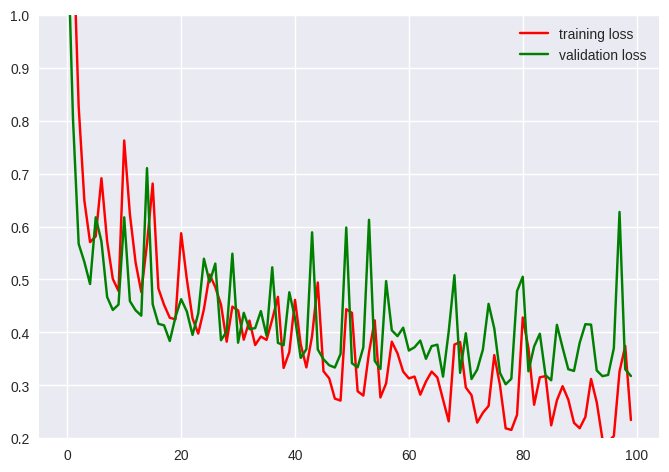

In [13]:
plt.style.use("seaborn")
plt.plot(EenetB7hist.history['loss'],label="training loss",c='red')
plt.plot(EenetB7hist.history['val_loss'],label="validation loss",c='green')
plt.ylim(0.2,1)
plt.legend()
plt.show()

/tmp/ipykernel_1029715/3143865732.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


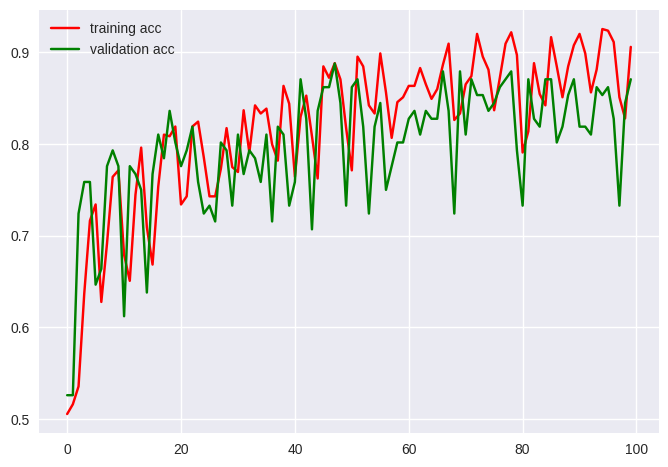

In [14]:
plt.style.use("seaborn")
plt.plot(EenetB7hist.history['acc'],label="training acc",c='red')
plt.plot(EenetB7hist.history['val_acc'],label="validation acc",c='green')
plt.legend()
plt.show()

4/4 [==============================] - 9s 2s/step
confusion Matrix:
[[43 14]
 [ 5 58]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

 Trimester 2       0.90      0.75      0.82        57
 Trimester 3       0.81      0.92      0.86        63

    accuracy                           0.84       120
   macro avg       0.85      0.84      0.84       120
weighted avg       0.85      0.84      0.84       120

**********************************************
Accuracy Score : 0.8416666666666667
**********************************************
F1 Score : 0.8592592592592592
**********************************************
Class Wise Accuracy :
Trimester 2 Accuracy : 75.43859649122807
Trimester 3 Accuracy : 92.06349206349206
**********************************************
ROC_AUC Score: 0.8375104427736006
**********************************************
Cohen_kappa score: 0.6801346801346801


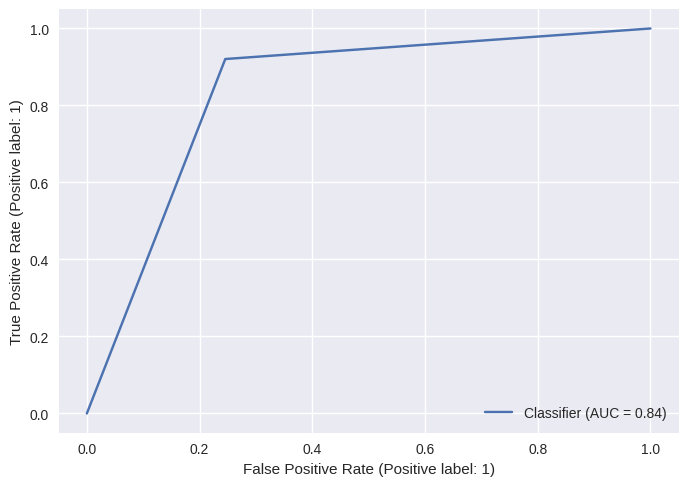

In [15]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 2','Trimester 3'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 2 Accuracy :", class_wise_acc[0]*100)
print("Trimester 3 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

In [16]:
df = pd.DataFrame({'loss' : EenetB7hist.history["loss"],
                                'val_loss' : EenetB7hist.history["val_loss"],
                                'accuracy' : EenetB7hist.history["acc"],
                               "val_accuracy": EenetB7hist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('First_third/EenetB7hist_13.csv')

# **Inception**

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')


for layer in base_model.layers:
    layer.trainable = False

2023-02-27 04:26:23.896209: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 04:26:23.896254: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-02-27 04:26:23.918272: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.9)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001), loss = 'binary_crossentropy',metrics = ['acc'])

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [9]:
Inceptionhist = model.fit(X_train,y_train, validation_data=(X_valid,y_valid), steps_per_epoch = 2,  epochs = 100)
#Here 169 train Data size and 27 Test Data size

Epoch 1/100
2/2 [==============================] - 8s 3s/step - loss: 1.6571 - acc: 0.5213 - val_loss: 0.7846 - val_acc: 0.5862
Epoch 2/100
2/2 [==============================] - 4s 2s/step - loss: 1.5997 - acc: 0.5851 - val_loss: 1.2448 - val_acc: 0.5172
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 1.5904 - acc: 0.5745 - val_loss: 0.6131 - val_acc: 0.7155
Epoch 4/100
2/2 [==============================] - 4s 2s/step - loss: 0.9802 - acc: 0.6418 - val_loss: 0.4260 - val_acc: 0.8103
Epoch 5/100
2/2 [==============================] - 4s 2s/step - loss: 0.8922 - acc: 0.6915 - val_loss: 0.4461 - val_acc: 0.7586
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 0.8885 - acc: 0.6933 - val_loss: 0.3960 - val_acc: 0.8448
Epoch 7/100
2/2 [==============================] - 4s 2s/step - loss: 0.7730 - acc: 0.7057 - val_loss: 0.3881 - val_acc: 0.8190
Epoch 8/100
2/2 [==============================] - 4s 2s/step - loss: 0.7048 - acc: 0.7465 - val_loss: 0

In [10]:
df = pd.DataFrame({'loss' : Inceptionhist.history["loss"],
                                'val_loss' : Inceptionhist.history["val_loss"],
                                'accuracy' : Inceptionhist.history["acc"],
                               "val_accuracy": Inceptionhist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('First_third/Inceptionhist_13.csv')

/tmp/ipykernel_1021571/1927832834.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


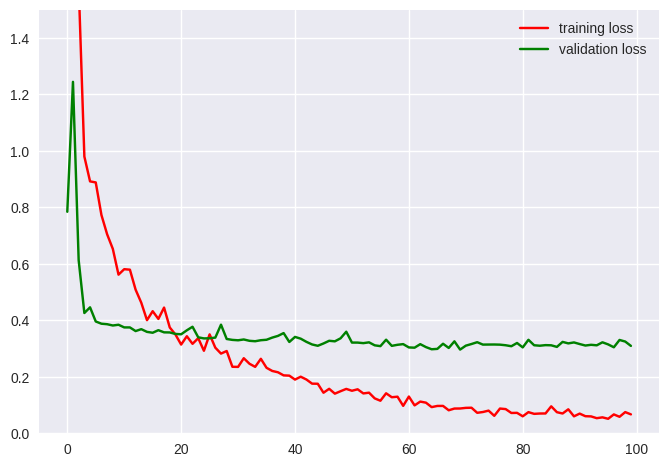

In [22]:
plt.style.use("seaborn")
plt.plot(Inceptionhist.history['loss'],label="training loss",c='red')
plt.plot(Inceptionhist.history['val_loss'],label="validation loss",c='green')
plt.ylim(0,1.5)
plt.legend()
plt.show()

/tmp/ipykernel_1021571/561891000.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


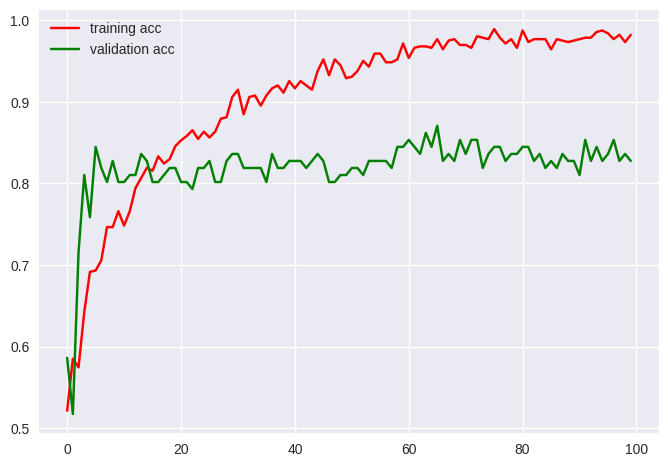

In [12]:
plt.style.use("seaborn")
plt.plot(Inceptionhist.history['acc'],label="training acc",c='red')
plt.plot(Inceptionhist.history['val_acc'],label="validation acc",c='green')
plt.legend()
plt.show()

4/4 [==============================] - 1s 151ms/step
confusion Matrix:
[[48  9]
 [10 53]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

 Trimester 2       0.83      0.84      0.83        57
 Trimester 3       0.85      0.84      0.85        63

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120

**********************************************
Accuracy Score : 0.8416666666666667
**********************************************
F1 Score : 0.848
**********************************************
Class Wise Accuracy :
Trimester 2 Accuracy : 84.21052631578947
Trimester 3 Accuracy : 84.12698412698413
**********************************************
ROC_AUC Score: 0.8416875522138679
**********************************************
Cohen_kappa score: 0.682804674457429


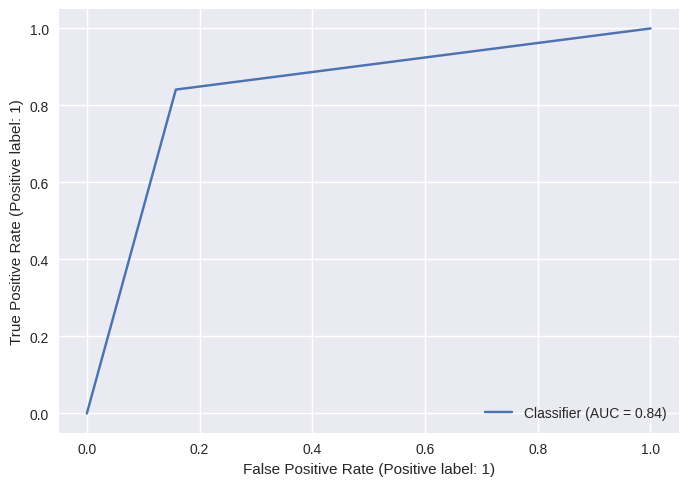

In [13]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 2','Trimester 3'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 2 Accuracy :", class_wise_acc[0]*100)
print("Trimester 3 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)